# Install Libraries & Dependencies

In [ ]:
!pip install scikit-image==0.19.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 112.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 94.3 MB/s eta 0:00:00
  Created wheel for scikit-image: filename=scikit_image-0.19.3-cp311-cp311-linux_x86_64.whl size=33912983 sha256=2f48fb797423c8685750ddfe74ac4e086807fb03f33f1a8733f1c0eed91dd8bc
  Stored in directory: /root/.cache/pip/wheels/7b/12/cd/f311cabf9e8708d1e29e9951ee0839fb89b69e1acc60c94927
Successfully built scikit-image
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.25.2
    Uninstalling scikit-image-0.25.2:
      Successfully uninstalled scikit-image-0.25.2


In [ ]:
!pip install scikit-image --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 71.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling scikit-image-0.19.3:
      Successfully uninstalled scikit-image-0.19.3


In [ ]:
!pip install scikit-image
!pip install scikit-image --upgrade

In [ ]:
import os
import numpy as np
import cv2
import glob
import random
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.feature import graycomatrix, graycoprops
import tensorflow as tf
from tensorflow.keras import layers, models


# Data Preprocessing

In [ ]:
import zipfile

zip_file_path = '/content/BraTs18.zip'
extract_path = '/content/BraTs18'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Files extracted to: {extract_path}")


Files extracted to: /content/BraTs18


In [ ]:
images_dir = "/content/BraTs18/brats18/images"  # Make sure this path is correct
masks_dir = "/content/BraTs18/brats18/masks"   # Make sure this path is correct

In [ ]:
image_files = sorted(glob.glob(os.path.join(images_dir, "image_*.png")))
mask_files = sorted(glob.glob(os.path.join(masks_dir, "mask_*.png")))

In [ ]:
images_dir = "/content/BraTs18/brats18/images"  # Make sure this path is correct
masks_dir = "/content/BraTs18/brats18/masks"   # Make sure this path is correct

   # Print the image files found to debug
image_files = sorted(glob.glob(os.path.join(images_dir, "image_*.png")))
print(f"Found {len(image_files)} image files: {image_files}")

mask_files = sorted(glob.glob(os.path.join(masks_dir, "mask_*.png")))
print(f"Found {len(mask_files)} mask files: {mask_files}")

Found 5042 image files: ['/content/BraTs18/brats18/images/image_1.png', '/content/BraTs18/brats18/images/image_10.png', '/content/BraTs18/brats18/images/image_100.png', '/content/BraTs18/brats18/images/image_1000.png', '/content/BraTs18/brats18/images/image_1001.png', '/content/BraTs18/brats18/images/image_1002.png', '/content/BraTs18/brats18/images/image_1003.png', '/content/BraTs18/brats18/images/image_1004.png', '/content/BraTs18/brats18/images/image_1005.png', '/content/BraTs18/brats18/images/image_1006.png', '/content/BraTs18/brats18/images/image_1007.png', '/content/BraTs18/brats18/images/image_1008.png', '/content/BraTs18/brats18/images/image_1009.png', '/content/BraTs18/brats18/images/image_101.png', '/content/BraTs18/brats18/images/image_1010.png', '/content/BraTs18/brats18/images/image_1011.png', '/content/BraTs18/brats18/images/image_1012.png', '/content/BraTs18/brats18/images/image_1013.png', '/content/BraTs18/brats18/images/image_1014.png', '/content/BraTs18/brats18/images

In [ ]:
assert len(image_files) == len(mask_files), "Mismatch between images and masks!"

In [ ]:
def load_image(file_path):
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
    return image


In [ ]:
def normalize_image(image):
    image = image.astype(np.float32)
    return image / 255.0  # Normalize pixel values to [0, 1]

In [ ]:
def enhance_contrast(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply((image * 255).astype(np.uint8)) / 255.0  # Convert back after applying CLAHE


In [ ]:
def resize_image(image, target_size=(112, 112)):
    return cv2.resize(image, target_size)

In [ ]:
def preprocess_image(file_path, target_size=(112, 112)):
    image = load_image(file_path)
    normalized_image = normalize_image(image)
    enhanced_image = enhance_contrast(normalized_image)
    resized_image = resize_image(enhanced_image, target_size)
    return resized_image

In [ ]:
combined = list(zip(image_files, mask_files))
random.shuffle(combined)
split_idx = int(len(combined) * 0.8)
train_pairs = combined[:split_idx]
val_pairs = combined[split_idx:]

In [ ]:
train_images = [preprocess_image(img_path) for img_path, _ in train_pairs]
train_masks = [load_image(mask_path) for _, mask_path in train_pairs]
val_images = [preprocess_image(img_path) for img_path, _ in val_pairs]
val_masks = [load_image(mask_path) for _, mask_path in val_pairs]

In [ ]:
print(f"Sample preprocessed image shape: {train_images[0].shape}")
print(f"Sample mask shape: {train_masks[0].shape}")

Sample preprocessed image shape: (112, 112)
Sample mask shape: (240, 240)


# Exploratory Data Analysis (EDA)

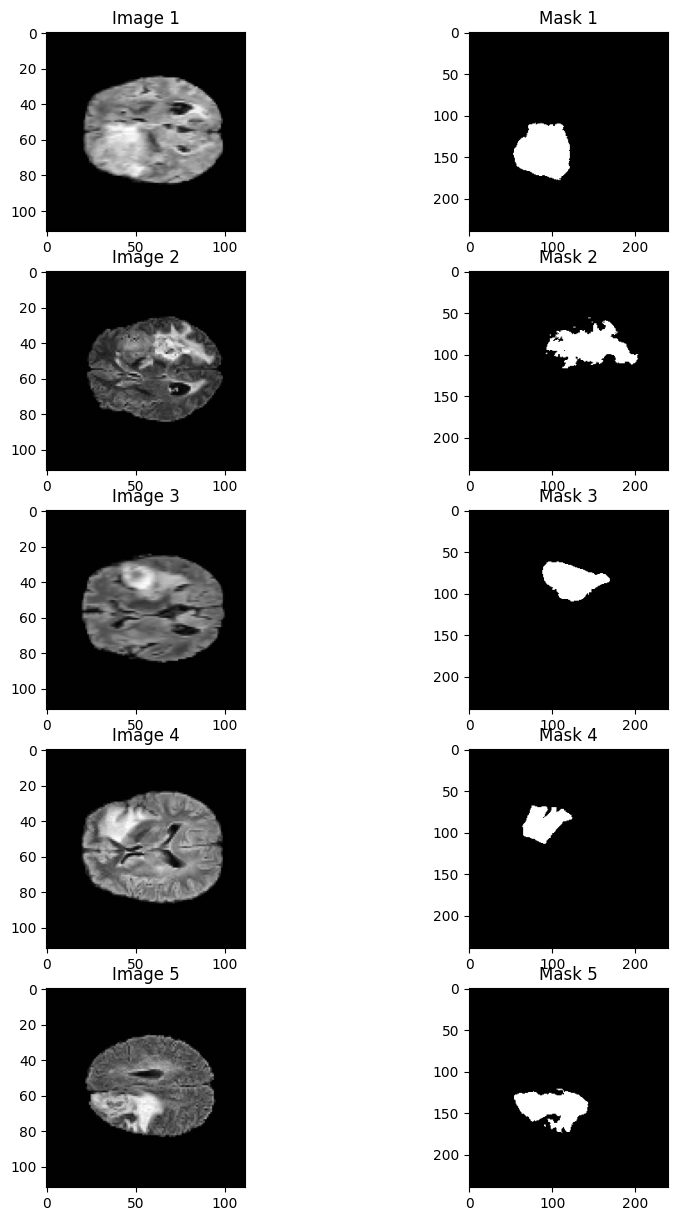

In [ ]:
def display_sample_images(images, masks, n_samples=5):
    fig, axes = plt.subplots(n_samples, 2, figsize=(10, 15))
    for i in range(n_samples):
        axes[i, 0].imshow(images[i], cmap='gray')
        axes[i, 0].set_title(f"Image {i+1}")
        axes[i, 1].imshow(masks[i], cmap='gray')
        axes[i, 1].set_title(f"Mask {i+1}")
    plt.show()

# Display sample images and masks
display_sample_images(train_images, train_masks)

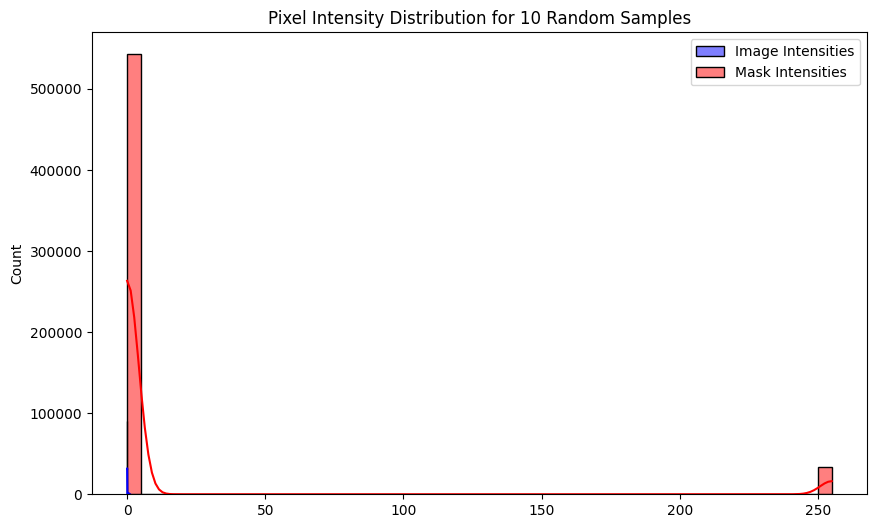

In [ ]:
import random

# Modify plot_pixel_intensity_histogram to accept a sample size
def plot_pixel_intensity_histogram(images, masks, sample_size=10):
    # Select a small random sample of images and masks
    sample_indices = random.sample(range(len(images)), sample_size)

    sample_images = [images[i] for i in sample_indices]
    sample_masks = [masks[i] for i in sample_indices]

    # Extract the pixel intensities from the selected sample
    image_intensity = np.concatenate([img.flatten() for img in sample_images])
    mask_intensity = np.concatenate([mask.flatten() for mask in sample_masks])

    # Plot the histograms for the sampled images and masks
    plt.figure(figsize=(10, 6))
    sns.histplot(image_intensity, bins=50, color='blue', label='Image Intensities', kde=True)
    sns.histplot(mask_intensity, bins=50, color='red', label='Mask Intensities', kde=True)
    plt.legend()
    plt.title(f'Pixel Intensity Distribution for {sample_size} Random Samples')
    plt.show()

# Plot histograms of pixel intensities for a small sample (e.g., 10 samples)
plot_pixel_intensity_histogram(train_images, train_masks, sample_size=10)


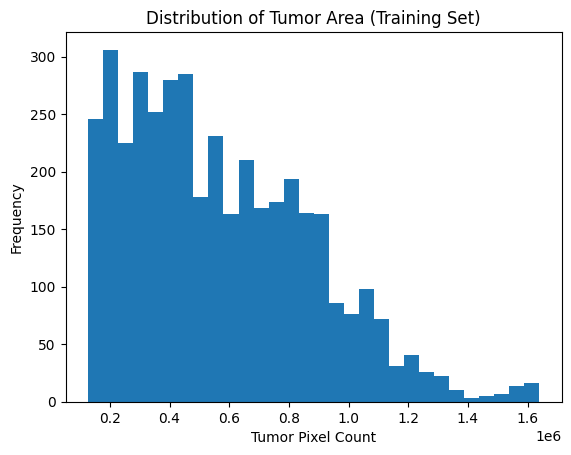

In [ ]:
areas = [np.sum(mask) for mask in train_masks]
plt.hist(areas, bins=30)
plt.title('Distribution of Tumor Area (Training Set)')
plt.xlabel('Tumor Pixel Count')
plt.ylabel('Frequency')
plt.show()


In [ ]:
def preprocess_mask(mask, target_size=(112, 112)):
    resized_mask = cv2.resize(mask, target_size, interpolation=cv2.INTER_NEAREST)
    binarized_mask = np.where(resized_mask > 127, 1, 0).astype(np.float32)
    return binarized_mask


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_datagen = ImageDataGenerator(rotation_range=15,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   zoom_range=0.1)
mask_datagen = ImageDataGenerator(rotation_range=15,
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  zoom_range=0.1)


In [ ]:
import numpy as np

def check_data_balance(masks):
    combined_masks = np.concatenate([mask.flatten() for mask in masks])
    total_pixels = combined_masks.size
    tumor_pixels = np.sum(combined_masks > 0)

    tumor_percentage = (tumor_pixels / total_pixels) * 100
    print(f"Tumor pixels percentage: {tumor_percentage:.2f}%")


In [ ]:
# Check data balance for training masks
print("Training set balance:")
check_data_balance(train_masks)

# Check data balance for validation masks
print("\nValidation set balance:")
check_data_balance(val_masks)


Training set balance:
Tumor pixels percentage: 3.88%

Validation set balance:
Tumor pixels percentage: 3.97%


# UNET Model

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 112, 112,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 112, 112,  │        320 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 112, 112,  │      9,248 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 56, 56,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 56, 56,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 56, 56,    │     36,928 │ conv2d_2[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 28, 28,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 28, 28,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 28, 28,    │    147,584 │ conv2d_4[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 14, 14,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 14, 14,    │    295,168 │ max_pooling2d_2[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 14, 14,    │    590,080 │ conv2d_6[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 28, 28,    │    131,200 │ conv2d_7[0][0]    │
│ (Conv2DTranspose)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 28, 28,    │          0 │ conv2d_transpose… │
│ (Concatenate)       │ 256)              │            │ conv2d_5[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 28, 28,    │    295,040 │ concatenate[0][0] │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 28, 28,    │    147,584 │ conv2d_8[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_1  │ (None, 56, 56,    │     32,832 │ conv2d_9[0][0]  

 Total params: 1,925,025 (7.34 MB)

 Trainable params: 1,925,025 (7.34 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 38s 51ms/step - accuracy: 0.9647 - loss: 0.1381 - mean_io_u: 0.4808 - val_accuracy: 0.9820 - val_loss: 0.0471 - val_mean_io_u: 0.4802
Epoch 2/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.9836 - loss: 0.0424 - mean_io_u: 0.4805 - val_accuracy: 0.9904 - val_loss: 0.0249 - val_mean_io_u: 0.4802
Epoch 3/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.9902 - loss: 0.0250 - mean_io_u: 0.4804 - val_accuracy: 0.9907 - val_loss: 0.0234 - val_mean_io_u: 0.4811
Epoch 4/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - accuracy: 0.9922 - loss: 0.0198 - mean_io_u: 0.4809 - val_accuracy: 0.9935 - val_loss: 0.0163 - val_mean_io_u: 0.4802
Epoch 5/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.9936 - loss: 0.0160 - mean_io_u: 0.4814 - val_accuracy: 0.9939 - val_loss: 0.0152 - val_mean_io_u: 0.4805
Epoch 6/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.9942 - loss: 0.0145 - mean_io_u: 0.4828 - val_accuracy: 0.9947

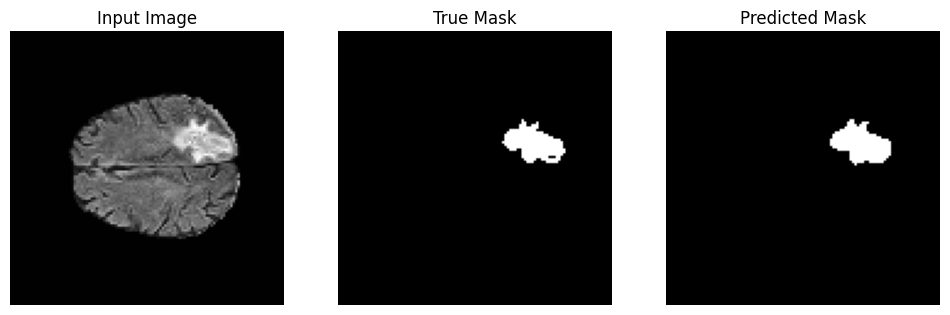

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model


train_masks = [preprocess_mask(mask) for mask in train_masks]
val_masks = [preprocess_mask(mask) for mask in val_masks]


x_train = np.array(train_images)[..., np.newaxis]
y_train = np.array(train_masks)[..., np.newaxis]
x_val = np.array(val_images)[..., np.newaxis]
y_val = np.array(val_masks)[..., np.newaxis]

def build_unet(input_shape=(112, 112, 1)):
    inputs = Input(input_shape)

    # Encoder
    c1 = Conv2D(32, 3, activation='relu', padding='same')(inputs)
    c1 = Conv2D(32, 3, activation='relu', padding='same')(c1)
    p1 = MaxPooling2D()(c1)

    c2 = Conv2D(64, 3, activation='relu', padding='same')(p1)
    c2 = Conv2D(64, 3, activation='relu', padding='same')(c2)
    p2 = MaxPooling2D()(c2)

    c3 = Conv2D(128, 3, activation='relu', padding='same')(p2)
    c3 = Conv2D(128, 3, activation='relu', padding='same')(c3)
    p3 = MaxPooling2D()(c3)

    # Bottleneck
    c4 = Conv2D(256, 3, activation='relu', padding='same')(p3)
    c4 = Conv2D(256, 3, activation='relu', padding='same')(c4)

    # Decoder
    u5 = Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(c4)
    u5 = concatenate([u5, c3])
    c5 = Conv2D(128, 3, activation='relu', padding='same')(u5)
    c5 = Conv2D(128, 3, activation='relu', padding='same')(c5)

    u6 = Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c2])
    c6 = Conv2D(64, 3, activation='relu', padding='same')(u6)
    c6 = Conv2D(64, 3, activation='relu', padding='same')(c6)

    u7 = Conv2DTranspose(32, 2, strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c1])
    c7 = Conv2D(32, 3, activation='relu', padding='same')(u7)
    c7 = Conv2D(32, 3, activation='relu', padding='same')(c7)

    outputs = Conv2D(1, 1, activation='sigmoid')(c7)
    model = Model(inputs, outputs)
    return model

model = build_unet()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.MeanIoU(num_classes=2)])
model.summary()

# Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=20,
    batch_size=8
)

# Evaluate
loss, acc, iou = model.evaluate(x_val, y_val)
print(f"Validation Accuracy: {acc:.4f}")
print(f"Validation Mean IoU: {iou:.4f}")

# Visualize prediction
import matplotlib.pyplot as plt

sample_index = 0
sample_input = x_val[sample_index:sample_index+1]
predicted_mask = model.predict(sample_input)[0, ..., 0] > 0.5

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(x_val[sample_index, ..., 0], cmap='gray')
plt.title('Input Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(y_val[sample_index, ..., 0], cmap='gray')
plt.title('True Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(predicted_mask, cmap='gray')
plt.title('Predicted Mask')
plt.axis('off')
plt.show()


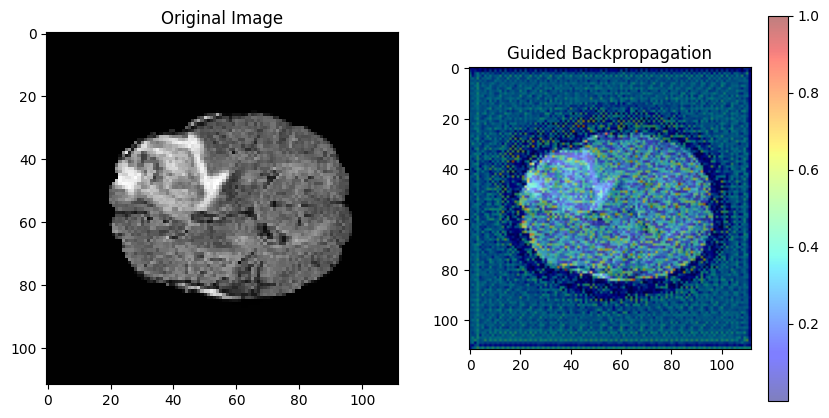

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

sample_image = x_val[0:1]
sample_mask = y_val[0:1]

def guided_backpropagation(model, image):
    @tf.custom_gradient
    def guided_relu(x):
        def grad(dy):
            return tf.cast(dy > 0, "float32") * tf.cast(x > 0, "float32") * dy
        return tf.nn.relu(x), grad

    model_guided = tf.keras.models.clone_model(model)
    for layer in model_guided.layers:
        if "relu" in layer.name.lower():
            layer.activation = guided_relu

    with tf.GradientTape() as tape:
        tape.watch(image)
        predictions = model_guided(image)
        loss = tf.reduce_mean(predictions)

    grads = tape.gradient(loss, image)
    guided_grads = tf.abs(grads)
    guided_grads = tf.reduce_mean(guided_grads, axis=-1)

    guided_grads = guided_grads / tf.reduce_max(guided_grads)
    return guided_grads.numpy()

sample_image_tensor = tf.convert_to_tensor(sample_image, dtype=tf.float32)
guided_grads = guided_backpropagation(model, sample_image_tensor)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(sample_image[0, :, :, 0], cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Guided Backpropagation")
plt.imshow(sample_image[0, :, :, 0], cmap='gray')
plt.imshow(guided_grads[0], cmap='jet', alpha=0.5)
plt.colorbar()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=Tensor(shape=(1, 112, 112, 1))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━

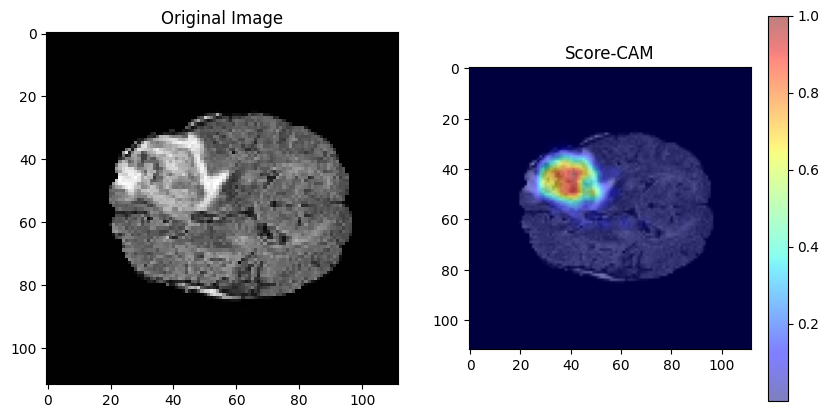

In [ ]:
def score_cam(model, image, layer_name, class_idx=0):
    feature_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )

    features, _ = feature_model(image)

    features = (features - tf.reduce_min(features)) / (tf.reduce_max(features) - tf.reduce_min(features) + 1e-8)

    height, width = image.shape[1], image.shape[2]
    importance_map = np.zeros((height, width))

    for channel in range(features.shape[-1]):
        feature_channel = features[0, :, :, channel:channel+1]
        feature_channel = tf.image.resize(feature_channel, (height, width))
        feature_channel = feature_channel.numpy()

        masked_image = image * feature_channel
        pred = model.predict(masked_image)
        score = np.mean(pred[0, :, :, class_idx])

        importance_map += feature_channel[..., 0] * score

    importance_map = np.maximum(importance_map, 0) / np.max(importance_map)
    return importance_map

layer_name = 'conv2d_8'
score_map = score_cam(model, sample_image, layer_name)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(sample_image[0, :, :, 0], cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Score-CAM")
plt.imshow(sample_image[0, :, :, 0], cmap='gray')
plt.imshow(score_map, cmap='jet', alpha=0.5)
plt.colorbar()
plt.show()

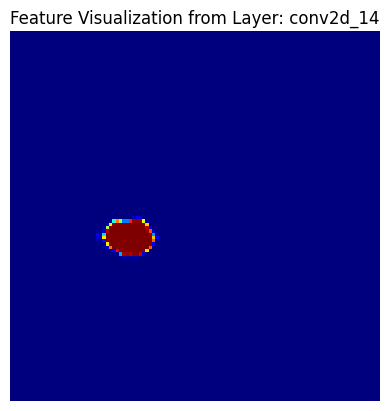

In [ ]:
sample_image = x_val[0:1]
layer_name = 'conv2d_14'
layer_model = tf.keras.models.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
sample_image_tensor = tf.convert_to_tensor(sample_image, dtype=tf.float32)
feature_map = layer_model(sample_image_tensor)
plt.imshow(feature_map[0, :, :, 0], cmap='jet')
plt.title("Feature Visualization from Layer: " + layer_name)
plt.axis('off')
plt.show()


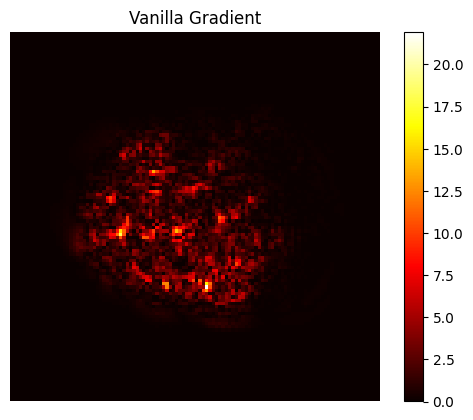

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Ensure the index is within the bounds of x_val
sample_index = min(4000, x_val.shape[0] - 1)
sample_image = x_val[sample_index:sample_index+1]
sample_image_tensor = tf.convert_to_tensor(sample_image, dtype=tf.float32)

with tf.GradientTape() as tape:
    tape.watch(sample_image_tensor)
    prediction = model(sample_image_tensor)
    # Access the correct element in the prediction tensor
    loss = prediction[0, :, :, 0]  # Assuming you want the first channel of the prediction

grads = tape.gradient(loss, sample_image_tensor)
vanilla_gradient = grads[0].numpy()

plt.imshow(np.abs(vanilla_gradient), cmap='hot')
plt.title("Vanilla Gradient")
plt.colorbar()
plt.axis('off')
plt.show()